exploratory data analysis (EDA)

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# load data
readmit_data = pd.read_csv("healthcare_patient_journey.csv")
readmit_data.head()

,patient_id,age,gender,chronic_condition,admission_type,department,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,discharge_status,readmitted_30d,total_cost_€,satisfaction_score
0,1,69,male,0,scheduled,Neurology,41,2,0,3,1,referred,1,1440,2
1,2,38,male,0,emergency,Oncology,17,3,1,2,0,recovered,0,2060,3
2,3,81,male,0,scheduled,Neurology,40,2,3,2,0,recovered,0,2110,3
3,4,67,female,1,emergency,ER,7,4,5,9,0,recovered,0,4070,3
4,5,88,male,1,emergency,Cardiology,34,3,7,5,0,recovered,1,3800,3


In [3]:
readmit_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   patient_id           3000 non-null   int64
 1   age                  3000 non-null   int64
 2   gender               3000 non-null   str  
 3   chronic_condition    3000 non-null   int64
 4   admission_type       3000 non-null   str  
 5   department           3000 non-null   str  
 6   wait_time_min        3000 non-null   int64
 7   length_of_stay_days  3000 non-null   int64
 8   procedures_count     3000 non-null   int64
 9   medication_count     3000 non-null   int64
 10  complications        3000 non-null   int64
 11  discharge_status     3000 non-null   str  
 12  readmitted_30d       3000 non-null   int64
 13  total_cost_€         3000 non-null   int64
 14  satisfaction_score   3000 non-null   int64
dtypes: int64(11), str(4)
memory usage: 351.7 KB


patient_id             0
age                    0
gender                 0
chronic_condition      0
admission_type         0
department             0
wait_time_min          0
length_of_stay_days    0
procedures_count       0
medication_count       0
complications          0
discharge_status       0
readmitted_30d         0
total_cost_€           0
satisfaction_score     0
dtype: int64
patient_id             0.0
age                    0.0
gender                 0.0
chronic_condition      0.0
admission_type         0.0
department             0.0
wait_time_min          0.0
length_of_stay_days    0.0
procedures_count       0.0
medication_count       0.0
complications          0.0
discharge_status       0.0
readmitted_30d         0.0
total_cost_€           0.0
satisfaction_score     0.0
dtype: float64


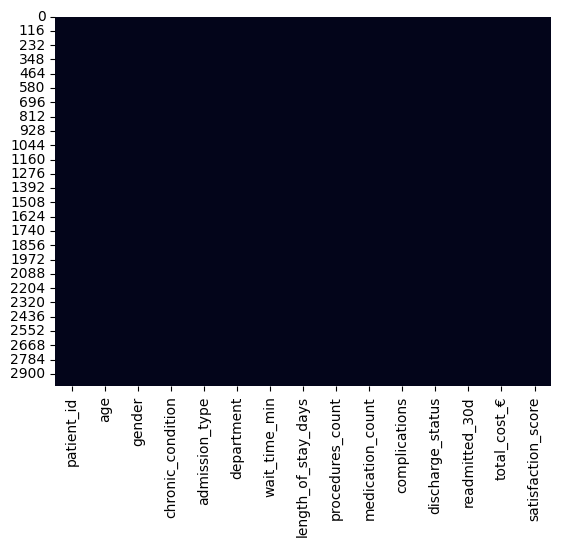

In [ ]:
# missing values
missing_values = readmit_data.isnull().sum().sort_values(ascending=False)
percent_missing = (readmit_data.isnull().mean() * 100).sort_values(ascending=False)
print(missing_values)
print(percent_missing)

sns.heatmap(readmit_data.isnull(), cbar=False) # visualize missingness
plt.show()


In [9]:
# identify outcome
outcome = "readmitted_30d"

# identify feature types
numeric_features = readmit_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = readmit_data.select_dtypes(include=['object', 'category', 'str']).columns

print("Outcome:", outcome)
print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Outcome: readmitted_30d
Numeric: Index(['patient_id', 'age', 'chronic_condition', 'wait_time_min',
       'length_of_stay_days', 'procedures_count', 'medication_count',
       'complications', 'readmitted_30d', 'total_cost_€',
       'satisfaction_score'],
      dtype='str')
Categorical: Index(['gender', 'admission_type', 'department', 'discharge_status'], dtype='str')


In [ ]:
# summary statistics
